In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, SpatialDropout2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# Alternate dataframes from GitLab
df = pd.read_csv('https://gitlab.com/lambpati/asherah-training/-/raw/main/steps.csv')
df2 = pd.read_csv('https://gitlab.com/lambpati/asherah-training/-/raw/main/Transients.csv')

df['Time'] = df['Time'].str.replace('sec', '')
df2['Time'] = df2['Time'].str.replace('sec', '')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/steps.csv')
df2 = pd.read_csv('/content/drive/My Drive/Transients.csv')

df['Time'] = df['Time'].str.replace('sec', '')
df2['Time'] = df2['Time'].str.replace('sec', '')

In [ ]:

scaler = StandardScaler()

scaler.fit(df)

Y = scaler.transform(df2)
X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=1/5, shuffle=True)

X = scaler.transform(X_train)


In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(96, activation='relu', input_shape=(96,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(96, activation='linear'))
model.compile(loss='mean_squared_error',
              optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                9312      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1940      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 96)                2016      
Total params: 13,493
Trainable params: 13,493
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(Y)

[[-5.46218174 -0.13007604 -0.13007155 ...  0.12831724  0.
   1.96041766]
 [-5.46215568 -0.13007604 -0.13007155 ...  0.80531626  0.
   1.96041256]
 [-5.46212962 -0.13007604 -0.13007155 ...  1.27064497  0.
   1.95366564]
 ...
 [ 1.98200138 -0.13007604 -0.13007155 ...  0.12831582  0.
   0.70869031]
 [ 1.98200138 -0.13007604 -0.13007155 ...  0.12831557  0.
   0.70869885]
 [ 1.98200138 -0.13007604 -0.13007155 ...  0.12831585  0.
   0.70869035]]


In [ ]:
earlystopper = EarlyStopping(patience=5, verbose=1) 
checkpointer = ModelCheckpoint('twinmodel', verbose=1, save_best_only=True)
results = model.fit(X[:,:], X[:,:], validation_split=0.1, batch_size=100, epochs=300, 
                    callbacks=[earlystopper, checkpointer])

Epoch 1/300
958/958 [==============================] - 3s 2ms/step - loss: 0.1176 - val_loss: 0.0338

Epoch 1: val_loss improved from inf to 0.03378, saving model to twinmodel
INFO:tensorflow:Assets written to: twinmodel/assets
Epoch 2/300
958/958 [==============================] - 2s 2ms/step - loss: 0.0300 - val_loss: 0.0260

Epoch 2: val_loss improved from 0.03378 to 0.02603, saving model to twinmodel
INFO:tensorflow:Assets written to: twinmodel/assets
Epoch 3/300
958/958 [==============================] - 2s 2ms/step - loss: 0.0236 - val_loss: 0.0224

Epoch 3: val_loss improved from 0.02603 to 0.02240, saving model to twinmodel
INFO:tensorflow:Assets written to: twinmodel/assets
Epoch 4/300
958/958 [==============================] - 2s 2ms/step - loss: 0.0195 - val_loss: 0.0183

Epoch 4: val_loss improved from 0.02240 to 0.01832, saving model to twinmodel
INFO:tensorflow:Assets written to: twinmodel/assets
Epoch 5/300
958/958 [==============================] - 2s 2ms/step - loss: 0

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model = load_model('twinmodel')
predicted = model.predict(X_test[:,:], verbose=1)

831/831 [==============================] - 1s 1ms/step


In [ ]:
model = load_model('twinmodel')
predictX = model.predict(X[:,:], verbose=1)

3324/3324 [==============================] - 4s 1ms/step


In [ ]:
model = load_model('twinmodel')
predicttrain = model.predict(Y[:,:], verbose=1)

8927/8927 [==============================] - 15s 2ms/step


In [ ]:
print(predicted.shape)
print(X_test.shape)
print(y_test.shape)
c=scaler.inverse_transform(X)
d=scaler.inverse_transform(X_test)
e=scaler.inverse_transform(predicted)
Q=scaler.inverse_transform(predictX)
G=scaler.inverse_transform(Y)
F=scaler.inverse_transform(predicttrain)
print(G[:,0])

(26586, 96)
(26586, 96)
(26586, 96)
[0.0000e+00 1.0000e-01 2.0000e-01 ... 2.8566e+04 2.8566e+04 2.8566e+04]


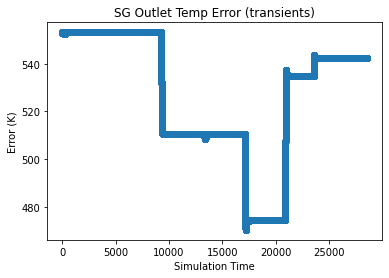

In [ ]:
plt.title("SG Outlet Temp Error (transients)")
plt.ylabel("Error (K)")
plt.xlabel("Simulation Time")
    
plt.scatter(G[:,0], (G[:,86]))

In [ ]:
plt.title("SG Outlet Temp Error (train)")
plt.ylabel("Error (K)")
plt.xlabel("Simulation Time")
    
plt.scatter(c[:,0], (c[:,86]-Q[:,86]))

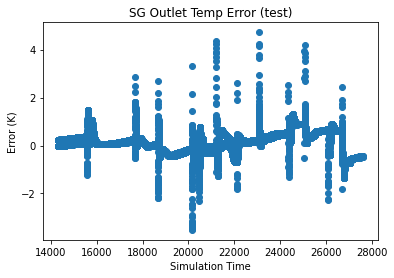

In [ ]:
plt.title("SG Outlet Temp Error (test)")
plt.ylabel("Error (K)")
plt.xlabel("Simulation Time")
    
plt.scatter(d[:,0], (d[:,86]-e[:,86]))

In [ ]:
plt.title("SG Outlet Temp (predicted)")
plt.ylabel("Temperature (K)")
plt.xlabel("Simulation Time")
    
plt.scatter(G[:,0], (F[:,86]))

In [ ]:
plt.title("SG Outlet Temp Error (test)")
plt.ylabel("Error (K)")
plt.xlabel("Simulation Time")
    
plt.scatter(d[:,0], (X_test[:,86]-predicted[:,86]))

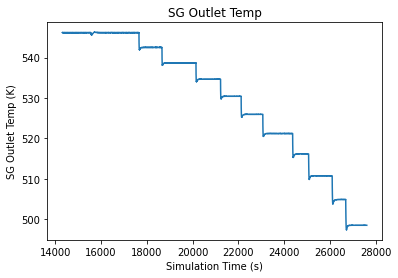

In [ ]:
plt.title("SG Outlet Temp")
plt.ylabel("SG Outlet Temp (K)")
plt.xlabel("Simulation Time (s)")
    
plt.plot(b[:,0], b[:,86])

In [ ]:
plt.title("Reactor Power")
plt.ylabel("Power Level (%)")
plt.xlabel("Simulation Time (s)")
    
plt.plot(b[:,0], b[:,67])

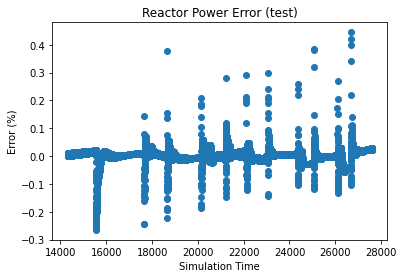

In [ ]:
plt.title("Reactor Power Error (test)")
plt.ylabel("Error (%)")
plt.xlabel("Simulation Time")
    
plt.scatter(d[:,0], (X_test[:,67]-predicted[:,67]))

In [ ]:
print (K.sqrt(K.mean(K.square(X_test[:,66]-predicted[:,66]))) )

tf.Tensor(0.017902657775617566, shape=(), dtype=float64)


In [ ]:
df.iloc[:,66]

0         586.333452
1         586.333372
2         586.333462
3         586.333381
4         586.333470
             ...    
132925    513.212842
132926    513.212757
132927    513.212878
132928    513.212811
132929    513.212874
Name: RX_OutCoolTemp, Length: 132930, dtype: float64

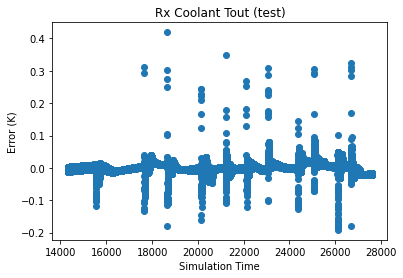

In [ ]:
plt.title("Rx Coolant Tout (test)")
plt.ylabel("Error (K)")
plt.xlabel("Simulation Time")
    
plt.scatter(d[:,0], (X_test[:,66]-predicted[:,66]))

<BarContainer object of 95 artists>

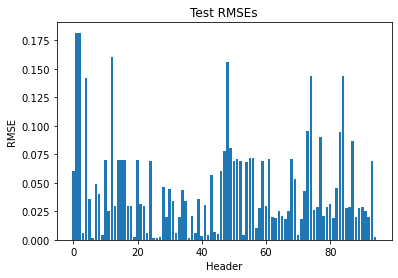

In [ ]:
Set = ['Time' , 'AF_LetdownFlow' , 'AF_LetdownValvePos' , 'AF_MakeupFLow' , 'AF_MakeupValvePos' , 'CC_PumpFlow' ,
       'CC_PumpInletTemp' , 'CC_PumpOutletTemp' , 'CC_PumpSpeed' , 'CC_PumpTemp' , 'CD_CondTemp' , 'CD_InSteamFlow' ,
       'CD_Level,CD_OutCondFlow' , 'CD_Press' , 'CD_SteamTemp' , 'CE_Pump1DiffPress' , 'CE_Pump1Flow' , 'CE_Pump1Speed' ,
       'CE_Pump1Temp' , 'CE_Pump2DiffPress' , 'CE_Pump2Flow' , 'CE_Pump2Speed' , 'CE_Pump2Temp' , 'CE_Pump3DiffPress' ,
       'CE_Pump3Flow' , 'CE_Pump3Speed' , 'CE_Pump3Temp' , 'CR_Position' , 'FW_Pump1DiffPress' , 'FW_Pump1Flow' ,
       'FW_Pump1Speed' , 'FW_Pump1Temp' , 'FW_Pump2DiffPress' , 'FW_Pump2Flow' , 'FW_Pump2Speed' , 'FW_Pump2Temp' ,
       'FW_Pump3DiffPress' , 'FW_Pump3Flow' , 'FW_Pump3Speed' , 'FW_Pump3Temp' , 'FW_TankLevel' , 'FW_TankPress' ,
       'GN_GenElecPow' , 'GN_GenFreq' , 'GN_GridFreq' , 'INT_SimulationTime' , 'PZ_Level' , 'PZ_Press' , 'PZ_Temp' ,
       'RC1_PumpDiffPress' , 'RC1_PumpFlow' , 'RC1_PumpSpeed' , 'RC1_PumpTemp' , 'RC2_PumpDiffPress' , 'RC2_PumpFlow' ,
       'RC2_PumpSpeed' , 'RC2_PumpTemp' , 'RX_CL1Flow' , 'RX_CL1Press' , 'RX_CL2Flow' , 'RX_CL2Press' , 'RX_CladTemp' ,
       'RX_FuelTemp' , 'RX_InCoolTemp' , 'RX_MeanCoolTemp' , 'RX_OutCoolTemp' , 'RX_ReactorPower' , 'RX_ReactorPress' ,
       'RX_TotalReac' , 'SD_CtrlValvePos' , 'SG1_InletTemp' , 'SG1_InletWaterFlow' , 'SG1_InletWaterTemp' , 'SG1_Level' ,
       'SG1_OutletSteamFlow' , 'SG1_OutletSteamTemp' , 'SG1_OutletTemp' , 'SG1_Press' , 'SG1_SteamTemp' ,
       'SG1_WaterTemp' , 'SG2_InletTemp' , 'SG2_InletWaterFlow' , 'SG2_InletWaterTemp' , 'SG2_Level' ,
       'SG2_OutletSteamFlow' , 'SG2_OutletSteamTemp' , 'SG2_OutletTemp' , 'SG2_Press' , 'SG2_SteamT' , 'SG2_WaterTemp' ,
       'TB_InSteamFlow' , 'TB_InSteamPress' , 'TB_OutSteamPress' , 'TB_Speed' , 'TB_SpeedCtrlValvePos']
Set =[]https://gitlab.com/lambpati/asherah-training/-/raw/main/steps.csv
for i in range(95):
  Set.append(i)

plt.title("Test RMSEs")
plt.ylabel("RMSE")
plt.xlabel("Header")
    
plt.bar(Set, RMSE)

In [ ]:
RMSE = []
for i in range(95):
  RMSE.append((K.sqrt(K.mean(K.square(X_test[:,i]-predicted[:,i]))) ).numpy())


In [ ]:
print (len(RMSE))

96


In [ ]:
(K.sqrt(K.mean(K.square(d[:,86]-e[:,86]))) ).numpy()

0.4439841039110583

In [ ]:
print(len(Set))

95
